In [1]:
#knn
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/AI TRAINING/seeds_dataset (2).csv')
df


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,NaN,NaN
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,NaN,NaN
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,NaN,NaN
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,NaN,NaN


In [2]:
df.isnull().sum()

,0
Area,0
Perimeter,0
Compactness,0
Length of kernel,0
Width of kernel,0
Asymmetry coefficient,0
Length of kernel groove,0
"Class (1, 2, 3)",0
Unnamed: 8,208
Unnamed: 9,209


In [3]:
df.shape

(210, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
 8   Unnamed: 8               2 non-null      object 
 9   Unnamed: 9               1 non-null      object 
dtypes: float64(7), int64(1), object(2)
memory usage: 16.5+ KB


In [5]:
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# Identify and drop non-numeric and target columns before standardization
# 'Unnamed: 8' and 'Unnamed: 9' are non-numeric object types causing the error.
# 'Class (1, 2, 3)' is likely the target variable, which should not be scaled with features.
columns_to_drop = ['Unnamed: 8', 'Unnamed: 9', 'Class (1, 2, 3)']
df_features = df.drop(columns=columns_to_drop)
df_sc = sc.fit_transform(df_features)
df_sc

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [9]:
x = df_sc  # Use the already standardized features
y = df['Class (1, 2, 3)'] # Use the correct target column name

In [ ]:
x

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred=knn.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[20,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



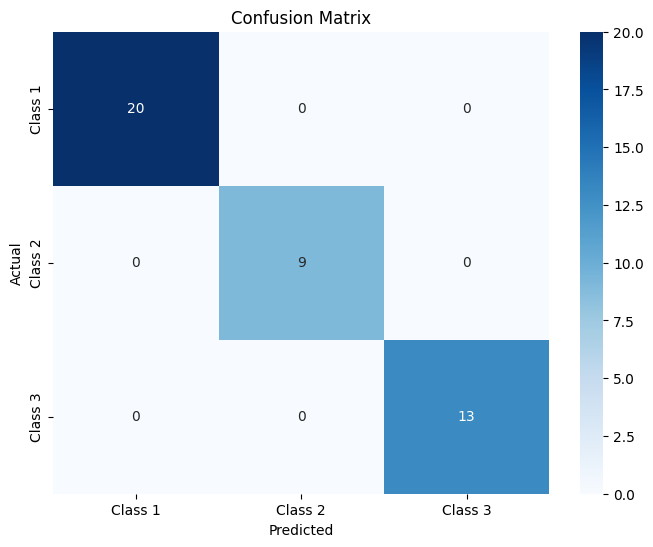

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()